In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
# import re
# import nltk
import sklearn.preprocessing as preprocessing
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

In [13]:
#movieId,genres,rate
movie_genres = pd.read_csv('tf_idf_data.csv')
movie_genres.head()

# userId,movieId,rating,timestamp
user_movie = pd.read_csv('./data/ratings.csv')
# user_movie = pd.read_csv('./data/1M/ratings.dat',sep='::',names=['userId','movieId','rating','timestamp'])
user_movie.head()
# user_movie.info()


#去除所有的无用项目，即无分类的项目
#filename:drop_movieId.csv
#None,movieId,title,genres
drop_data = pd.read_csv('drop_movieId.csv')
user_movie = user_movie[(True^user_movie['movieId'].isin(drop_data['movieId']))]

#去时间戳数据列
user_movie = user_movie.drop('timestamp',axis=1)
user_movie.head()

,movieId,genres,rate
0,1,1,2
1,1,2,2
2,1,3,2
3,1,4,1
4,1,8,2


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## 切分数据集

In [23]:
#切分数据集为训练集、测试集（其中训练集继续分为训练集和验证集）
y = user_movie['rating']
X = user_movie
#切分训练集与测试集
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
#切分训练接和验证集
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=1)


# X_train.head()
# movie_genres.head()

train = X_train.pivot('userId','movieId','rating')
train = train.fillna(value=0)
train.head()
# 填充 X_train
# X_train = train.copy(deep=True)
# for ids in range(0,len(X_train)):
#     rate_user = round(X_train.iloc[ids].sum() / (len(X_train.iloc[ids]) - X_train.iloc[ids].value_counts()[0]),0)
#     X_train.iloc[ids] = X_train.iloc[ids].replace(0,rate_user)
# X_train.head()
# X_train = X_train.pivot()
X_train.head()
test = X_test
# test = X_test.pivot('userId','movieId','rating')
# test = test.fillna(value=0)
train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,193565,193567,193571,193573,193579,193581,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,userId,movieId,rating
58650,382,3703,5.0
47936,310,745,5.0
37420,250,45,4.0
48950,317,84392,3.0
96603,603,2150,3.0


movieId,1,2,3,4,5,6,7,8,9,10,...,190221,193565,193567,193571,193573,193579,193581,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 对比试验：余弦相似度，K近邻

In [17]:
# 对比实验及画图统计结果
def cos_sim(n_number,train):
    # n_number 近邻数
    # 余弦相似度计算相似度
    sim = cosine_similarity(train)
    num = len(train)
    index = []
    corr = []
    for number in range(0,num):
        ind = np.argpartition(sim[number],-(n_number+2))[-(n_number+2):]
        index.append(ind)
        corr.append([number,index[number],sim[number][index[number]]])
    return corr
def predict(corr):

    # 遍历测试集
    mae = 0
    number = 0
    for test_id in range(0,len(test)):
        test_one = test[test_id:test_id+1]
        # 找到一个movie
        movie_id = int(test_one.movieId)
        # 当训练集中无此项目时，跳过
        if movie_id not in train.columns:
            continue
        # 从测试集中找到一个user
        user_id = int(test_one.userId) 
        rate = 0
        sim_nei = 0
#         print(user_id)
        rate_user = round(train.loc[user_id].sum() / (len(train.loc[user_id]) - train.loc[user_id].value_counts()[0]),1)
        # 得到user对movie的实际评分
        rating = int(test_one.rating)
        # 存储近邻
        neighbor = []
        # 存储相似度矩阵
        sim = []
        
        neighbor,sim = corr[user_id-1][1],corr[user_id-1][2]   #取得近邻数据与其对应的相似度

        for one in range(0,len(neighbor)):
            # 拿到近邻id
#             print(cu,pos,one,int(neighbor[one]))
            nei_id = int(neighbor[one]) + 1  
#             print(user_id,cu,pos,nei_id)
#             return 0
            # 拿到自己时跳过
            if user_id == nei_id:
                continue
            # 当一近邻对movie有评分
#             print(nei_id,movie_id)
            if train.loc[nei_id][movie_id] > 0:
                # 近邻用户的平均评分
#                 print('测试数据id；'+str(test_id)+'，近邻用户id：'+str(nei_id)+'，movie的id:'+str(movie_id))
                rate_nei = round(train.loc[nei_id].sum() / (len(train.loc[nei_id]) - train.loc[nei_id].value_counts()[0]),1)
                rate += sim[one] * (train.loc[nei_id][movie_id] - rate_nei)    # 邻居的评分与平均评分的差乘上相似度的累加和
                sim_nei += sim[one]    # 相似度的累加和
        if sim_nei == 0 : continue
        rate_predict = round(rate_user + rate/sim_nei,2)
        mae += abs(rate_predict - rating)
        number += 1
    return round(mae/number,2)


In [18]:
# 搭建模型
def kmeans(data,n_clusters=7):
    model = KMeans(n_clusters,max_iter=300)  # 实例化模型
    model.fit(data)          # 训练模型
    labels_ =  model.labels_        # 获取类簇集合
    lst = []
    for cate in range(0,n_clusters):
        lst.append([i for i,x in enumerate(labels_) if x ==cate ])
    return lst

def get_corr(lst,n_clusters,nei=20):
    corr_data = []
    for cu in range(0,n_clusters):        #  cu 代表着类簇
        data = train.iloc[lst[cu]]     # 整个类簇的数据
        corr_ = cos_sim(nei,data)      # 整个类簇的相似度矩阵 
        corr_data.append(corr_)   # 将处理过的相似矩阵存储起来
    return corr_data

In [19]:
def predict_means(corr_data,lst):

    # 遍历测试集
    mae = 0
    number = 0
    for test_id in range(0,len(test)):
        test_one = test[test_id:test_id+1]
        # 找到一个movie
        movie_id = int(test_one.movieId)
        # 当训练集中无此项目时，跳过
        if movie_id not in train.columns:
            continue
        # 从测试集中找到一个user
        user_id = int(test_one.userId) 
        rate = 0
        sim_nei = 0

        rate_user = round(train.loc[user_id].sum() / (len(train.loc[user_id]) - train.loc[user_id].value_counts()[0]),1)
        # 得到user对movie的实际评分
        rating = int(test_one.rating)
        # 存储近邻
        neighbor = []
        # 存储相似度矩阵
        sim = []
        # 查找当前用户的簇
        for cu in range(0,8):
            if user_id-1 in lst[cu]:
                break
        corr = corr_data[cu]    # 选定要用的簇集
        pos = lst[cu].index(user_id-1)  # 找到userid在lst中的下标值
        neighbor,sim = corr[pos][1],corr[pos][2]   #取得近邻数据与其对应的相似度

        for one in range(0,len(neighbor)):
            # 拿到近邻id
            nei_id = lst[cu][int(neighbor[one])] + 1    # 拿到实际的近邻id(绝对)
            # 拿到自己时跳过
            if user_id == nei_id:
                continue
             # 当一近邻对movie有评分
            if train.loc[nei_id][movie_id] > 0:
                # 近邻用户的平均评分
                rate_nei = round(train.loc[nei_id].sum() / (len(train.loc[nei_id]) - train.loc[nei_id].value_counts()[0]),1)
                rate += sim[one] * (train.loc[nei_id][movie_id] - rate_nei)    # 邻居的评分与平均评分的差乘上相似度的累加和
                sim_nei += sim[one]    # 相似度的累加和
        if sim_nei == 0 : continue
        rate_predict = round(rate_user + rate/sim_nei,2)
        mae += abs(rate_predict - rating)
        number += 1
    return round(mae/number,2)

In [58]:
lst_ = kmeans(X_train_data,7)
for one in lst_:
    print(len(one))

88
98
91
90
72
104
67


In [59]:
for nei in range(60,70,10):
    n = 7
    print('近邻数：'+str(nei)+',簇类数：'+str(n)+',评价标准: mae ')
    # 对比试验：基础
#     start = time.time()
#     corr_cos = cos_sim(nei,train)
#     mae = predict(corr_cos)
#     end = time.time()
#     print('普通推荐：'+str(mae)+', time:'+str(end-start))
    # 对比试验：直接推荐
#     start = time.time()
#     corr_cos_ = cos_sim(nei,X_train_data)
#     mae = predict(corr_cos_)
#     end = time.time()
#     print('直接推荐：'+str(mae)+', time :'+str(end-start))
    # 目标
#     lst_ = kmeans(X_train_data,n)       # 数值从0开始
    corr_data_ = get_corr(lst_,n,nei)      # 得到分开来的邻居集 
    start = time.time()
    mae_new = predict_means(corr_data_,lst_)
    print('目标推荐:'+str(mae_new)+', time:'+str(time.time()-start))
#     break

近邻数：60,簇类数：7,评价标准: mae 
目标推荐:0.76, time:465.59758400917053


Text(0.5,0,'近邻数')

Text(0,0.5,'mae')

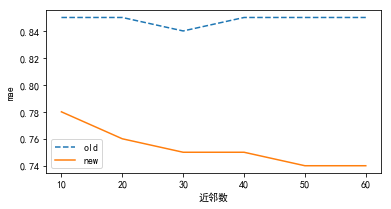

In [4]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
rate = [0.78,0.76,0.75,0.75,0.74,0.74]
rate_ = [0.85,0.85,0.84,0.85,0.85,0.85]
X = [10,20,30,40,50,60]
fig = plt.figure(figsize=(6,3)) # 设置图大小 figsize=(6,3)
plt.plot(X, rate_,'--',label = '传统协同过滤算法')
plt.plot(X, rate,'-',label='改进xie' )
plt.legend(loc='best')
plt.xlabel('近邻数')
plt.ylabel('mae值')
plt.show()

In [ ]:
近邻数：10,簇类数：7,评价标准: mae 
目标推荐:0.79, time:161.82246208190918
近邻数：20,簇类数：7,评价标准: mae 
目标推荐:0.77, time:251.10233092308044
近邻数：30,簇类数：7,评价标准: mae 
目标推荐:0.76, time:329.2518780231476
近邻数：40,簇类数：7,评价标准: mae 
目标推荐:0.76, time:383.774156332016
近邻数：50,簇类数：7,评价标准: mae 
目标推荐:0.75, time:438.4761300086975
近邻数：60,簇类数：7,评价标准: mae 
目标推荐:0.76, time:465.59758400917053
        
        
普通实验  0.85 0.85 0.84 0.85 0.85
# small
近邻数：10,簇类数：7,评价标准: mae 
直接推荐：0.8, time :177.60723209381104
目标推荐:0.79, time:199.20653462409973
近邻数：20,簇类数：7,评价标准: mae 
直接推荐：0.77, time :287.34189796447754
目标推荐:0.77, time:299.8514199256897
近邻数：30,簇类数：7,评价标准: mae 
直接推荐：0.76, time :381.9600033760071
目标推荐:0.76, time:404.29230642318726
近邻数：40,簇类数：7,评价标准: mae 
直接推荐：0.75, time :478.8529326915741
目标推荐:0.76, time:473.795476436615
        
均值填充后
# 近邻数：20,簇类数：7,评价标准: mae 
# 普通推荐：0.75, time:355.58148431777954
# 直接推荐：0.8, time :201.92821764945984
# 近邻数：25,簇类数：7,评价标准: mae 
# 普通推荐：0.74, time:407.4019720554352
# 直接推荐：0.79, time :234.12414813041687
# 近邻数：30,簇类数：7,评价标准: mae 
# 普通推荐：0.74, time:476.63984656333923
# 直接推荐：0.79, time :264.952782869339
# 近邻数：35,簇类数：7,评价标准: mae 
# 普通推荐：0.74, time:531.9410889148712
# 直接推荐：0.78, time :299.43557953834534

# 1M
近邻数：20,簇类数：7,评价标准: mae 
# 普通推荐：0.75, time:3594.9323196411133
直接推荐：0.81, time :2725.078401327133
目标推荐: 0.76, time:3352.9919073581696
近邻数：30,簇类数：7,评价标准: mae 
# 普通推荐：0.74, time:4765.620988607407
直接推荐：0.79, time :3630.4941322803497
目标推荐: 0.75, time:4499.41402220726

In [176]:
# X_train.head()
# movie_genres = movie_genres[movie_genres["movieId"].isin(X_train.loc[1].index.values)]
# movie_genres = movie_genres.pivot('movieId','genres','rate')
# movie_genres = movie_genres.fillna(value=0)
# movie_genres.head()
# movie_genres.info()
# user_genres = pd.DataFrame(np.dot(X_train,movie_genres))
# user_genres.head()

In [181]:
def get_user_genres(user_id,genres_id,X_data,movie_genres):
    # 计算得到某一具体用户对某一具体体裁的评分计算值
    
    rate_lst = []
    rate = 0
    # 选定一个项目
    movie_choose = X_data[X_data["userId"] == user_id]
    
    # 获得movie_genres数据
    data_mg = movie_genres[(movie_genres["movieId"].isin(movie_choose["movieId"]))]
    data_mg = data_mg[data_mg["genres"] == genres_id]
    
    # 考虑极端情况
    if len(data_mg) == 0:
        return 0
    
    for idx in range(len(data_mg)):
        movie_id = int(data_mg[idx:idx+1].movieId)
        
        # um = user_movie
        # mg = movie_genres
        rating_um = int(movie_choose[idx:idx+1].rating)
        rating_mg = int(data_mg[data_mg["movieId"].isin([movie_id])].rate)
        rate_lst.append( rating_mg * rating_um )
    rate = sum(rate_lst)/len(data_mg)
    
    #返回评分值
    return rate

# file_name 待输出文件名
# data 待处理数据 
def make_file(file_name,data):
    #处理训练集
    user_lst = []  #存储已经处理过的user_id
    user_genres = pd.DataFrame(columns = ["userId","genres","rate"])


    start = time.time()
    for id_u in range(len(data)):
        index_user = data[id_u:id_u+1].index    #拿到索引id
        user_id = int(data.loc[index_user].userId)   #拿到用户id

        if user_id in user_lst:           #用户已经处理过就跳过本次循环
            continue
        else : 
            user_lst.append(int(user_id))
        for genres_id in range(0,19):
            rate = get_user_genres(user_id,genres_id,data,movie_genres)
            user_genres = user_genres.append([{"userId":user_id,"genres":genres_id,"rate":rate}],ignore_index=True)
    end = time.time()

    print("time spend:"+str(end - start))

    print('user number: ' + str(len(user_lst)))
    user_genres.to_csv(file_name,index=False,encoding='utf-8')
make_file("user_genres_train.csv",X_train)
# make_file("user_genres_test.csv",X_test)

time spend:292.3914008140564
user number: 610


In [24]:
# 整理训练集为等长向量形式
user_genres_train = pd.read_csv('user_genres_train.csv')
# X_train = user_genres

#以userId为行索引，genres为列索引,rate为值进行翻转
X_train = user_genres_train.pivot('userId','genres','rate')
# X_train.pop(18)
X_train.head()
# 对各列进行归一化处理
min_max_scaler = preprocessing.MinMaxScaler()
X_train_data  = min_max_scaler.fit_transform(X_train)


X_train_data[0]
test.head()

genres,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
userId,,,,,,,,,,,,,,,,,,,
1,8.753623,9.650794,9.157895,9.600000,8.852459,10.750000,0.0,5.877551,10.457143,12.00,14.727273,0.000000,11.461538,12.307692,10.705882,11.666667,8.818182,14.352941,17.666667
2,8.000000,7.000000,0.000000,0.000000,12.200000,10.125000,17.5,7.818182,0.000000,0.00,9.000000,13.666667,0.000000,9.000000,12.000000,9.333333,7.714286,0.000000,0.000000
3,6.727273,4.800000,5.750000,4.600000,2.375000,5.000000,0.0,4.071429,5.000000,0.00,4.500000,0.000000,0.000000,0.000000,5.500000,6.916667,3.600000,6.200000,0.000000
4,8.523810,9.416667,7.000000,8.333333,9.087500,9.950000,25.0,8.876289,9.133333,15.25,15.000000,10.000000,10.400000,12.555556,10.760870,11.142857,8.344828,16.666667,15.700000
5,8.000000,7.333333,8.000000,11.000000,7.500000,10.727273,0.0,8.200000,9.000000,0.00,20.000000,20.000000,8.000000,0.000000,12.666667,12.000000,8.857143,15.000000,0.000000


array([0.54710145, 0.64338624, 0.54947368, 0.48      , 0.44262295,
       0.61428571, 0.        , 0.26927675, 0.69714286, 0.6       ,
       0.58909091, 0.        , 0.57307692, 0.61538462, 0.53529412,
       0.58333333, 0.44090909, 0.71764706, 0.70666667])

,userId,movieId,rating
79413,492,1474,4.0
96279,603,852,1.0
72975,470,500,4.0
59622,387,2488,3.5
60635,391,2396,4.0


## 聚类开始

In [ ]:
# user_id,cu,pos,nei_id
# user_id 492  in list 59
# lst_[7][61]
# corr_data_[7][61][2]
# corr_data_[7][61][1]
# lst_[7][41]

### 聚类推荐流程
    1. 聚类返回各个簇的集合
    2. 在各簇集中计算相似度得到最近邻
    3. 测试集中取目标，找目标的近邻

### 推荐流程
    1.找定一个user
    2.从测试集中找到user对应的item 有则下一步，无则下一个user
    3.获取user的近邻，从其归属的类簇中计算
    3.在user的近邻中找item 有则下一步，无则下一个近邻
    4.找到item后与相似度相乘后做累加，随后比上能找到item的所有近邻的相似度的和
    5.将上一步得到的值加上user的平均评分值

    按照训练集数据计算相似度，得到近邻，使用测试集中的数据来进行验证，计算mae的值
    mae 推荐列表里所有的推荐评分与实际评分差值的均值
    topN 根据用户近邻给用户推荐一批项目
    recall 召回率 所有用户中，推荐命中测试集中项目数量与测试集项目数量
    precision 准确率 所有用户中，推荐命中测试集中项目数量与推荐项目总和

In [307]:
# u_data_path="./data/"
# header = ['user_id', 'item_id', 'rating', 'timestamp']
# df = pd.read_csv(u_data_path+'ratings.csv', names=header)
# # print(df.head(5))
# # print(len(df))
# #观察数据前两行。接下来，让我们统计其中的用户和电影总数。
# n_users = df.user_id.unique().shape[0]  #unique()为去重.shape[0]行个数
# n_items = df.item_id.unique().shape[0]
# # print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_items))
# from sklearn import model_selection as cv
# train_data, test_data = cv.train_test_split(df, test_size=0.25)

# # #Create two user-item matrices, one for training and another for testing
# # #差别在于train_data与test_data
# train_data_matrix = np.zeros((n_users, n_items))
# print(train_data_matrix.shape)
# for line in train_data.itertuples():
#     train_data_matrix[int(line[1])-1, int(line[2])-1] = float(line[3])
# test_data_matrix = np.zeros((n_users, n_items))
# for line in test_data.itertuples():
#     test_data_matrix[line[1]-1, line[2]-1] = line[3]
# 你可以使用 sklearn 的pairwise_distances函数来计算余弦相似性。注意，因为评价都为正值输出取值应为0到1.
# from sklearn.metrics.pairwise import pairwise_distances
# user_similarity = pairwise_distances(train, metric='cosine')
#矩阵的转置实现主题的相似度
# item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
#     elif type == 'item':
#         pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred
# item_prediction = predict(train_data_matrix, item_similarity, type='item')
# #有许多的评价指标，但是用于评估预测精度最流行的指标之一是Root Mean Squared Error (RMSE)。
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()#nonzero(a)返回数组a中值不为零的元素的下标,相当于对稀疏矩阵进行提取
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))
start = time.time()
train_data = train.as_matrix(columns=None)
test_data = test.as_matrix(columns=None)
user_similarity = cosine_similarity(train)
user_prediction = predict(train_data, user_similarity, type='user')
end = time.time()
print(str(end-start))
print ('User-based CF RMSE: ' + str(rmse(user_prediction, test_data)))
# print ('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))


0.3341553211212158
User-based CF RMSE: 3.457422916699984
